<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P3-Practica-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Parte I: Clasificación

Este conjunto de datos, proporcionado por Avazu, contiene registros de publicidad en línea (como impresiones de anuncios y clicks) recolectados durante 11 días. El objetivo es predecir la probabilidad de que un usuario haga clic en un anuncio (CTR), una métrica crítica para optimizar campañas de sponsored search y real-time bidding. La práctica consiste en desarrollar un modelo de clasificación para este fin, utilizando características como el tipo de dispositivo, contexto de la página y datos anónimos del usuario.

La descripción completa de las features se proporciona a continuación:

| Nombre Columna      | Tipo (Ejemplo)           | Descripción                                                                 | ¿Relevante para Modelo? |
|---------------------|--------------------------|-----------------------------------------------------------------------------|-------------------------|
| `id`               | String (ej: "100000")    | Identificador único del registro (anuncio).                                 | ❌ No                   |
| **`click`**        | **Binaria (0/1)**        | **Variable target**: 0 = No hubo clic, 1 = Sí hubo clic.                    | ✅ **Sí**               |
| `year`, `month`, `hour`             | Int        | Año, mes y hora           | ✅ Sí  |
| `C1`               | Categórica anónima       | Variable categórica encriptada (sin contexto definido).                     | ✅ Sí                   |
| `banner_pos`       | Numérica/Categórica      | Posición del banner en la página (ej: 0, 1, 2...).                          | ✅ Sí                   |
| `site_id`          | Categórica (ej: "1fbe01")| ID del sitio web donde se muestra el anuncio.                               | ✅ Sí (alta cardinalidad) |
| `site_domain`      | Categórica (ej: "f38457")| Dominio del sitio web.                                                      | ⚠️ Tal vez (redundante con `site_id`) |
| `site_category`    | Categórica (ej: "28905b")| Categoría del sitio (ej: noticias, deportes...).                            | ✅ Sí                   |
| `app_id`           | Categórica (ej: "ecadf6")| ID de la aplicación (si el anuncio se muestra en una app móvil).             | ✅ Sí (alta cardinalidad) |
| `app_domain`       | Categórica (ej: "7801e8")| Dominio de la aplicación.                                                   | ⚠️ Tal vez (redundante con `app_id`) |
| `app_category`     | Categórica (ej: "07d7df")| Categoría de la aplicación (ej: juegos, redes sociales...).                 | ✅ Sí                   |
| `device_id`        | Categórica (ej: "a99f2a")| ID del dispositivo del usuario.                                             | ⚠️ Alta cardinalidad (¿agrupar?) |
| `device_ip`        | Categórica (ej: "d1b8b4")| Dirección IP del dispositivo.                                               | ❌ No (a menos que se agrupe por región) |
| `device_model`     | Categórica (ej: "8a4875")| Modelo del dispositivo (ej: iPhone X, Samsung Galaxy S10...).               | ✅ Sí                   |
| `device_type`      | Categórica (ej: 1, 2)    | Tipo de dispositivo (ej: 1 = móvil, 2 = tablet, etc.).                      | ✅ Sí                   |
| `device_conn_type` | Categórica (ej: 0, 2)    | Tipo de conexión (ej: 0 = WiFi, 2 = 4G...).                                 | ✅ Sí                   |
| `C14` - `C21`      | Categóricas anónimas     | Variables categóricas encriptadas (sin contexto definido).                   | ✅ Sí (evaluar importancia) |

Dataset: https://www.kaggle.com/competitions/avazu-ctr-prediction/data

In [1]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/refs/heads/main/03%20Machine%20Learning/data/ctr_prediction.csv'

df = pd.read_csv(url)
df

,Unnamed: 0,click,C1,banner_pos,site_id,site_category,app_id,app_category,device_model,device_type,...,C15,C16,C17,C18,C19,C20,C21,year,month,day
0,0,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,44956a24,1,...,320,50,1722,0,35,-1,79,2014,10,21
1,1,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,711ee120,1,...,320,50,1722,0,35,100084,79,2014,10,21
2,2,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,8a4875bd,1,...,320,50,1722,0,35,100084,79,2014,10,21
3,3,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,6332421a,1,...,320,50,1722,0,35,100084,79,2014,10,21
4,4,0,1005,1,fe8cc448,0569f928,ecad2386,07d7df22,779d90c2,1,...,320,50,2161,0,35,-1,157,2014,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,1005,0,85f751fd,50e219e0,5e3f096f,0f2161f8,be74e6fe,1,...,320,50,2480,3,297,100111,61,2014,10,21
99996,99996,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,711ee120,1,...,320,50,1722,0,35,-1,79,2014,10,21
99997,99997,1,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,293291c1,1,...,320,50,1722,0,35,-1,79,2014,10,21
99998,99998,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,8a4875bd,1,...,320,50,1722,0,35,-1,79,2014,10,21


## Instrucciones

0. Verifica si hay valores faltantes.
1. Extrae la variable target `click`. Verifica el balanceo de clases.
2. Quita las variables que consideres necesarias de acuerdo a la tabla anterior.
3. Forma la matriz de features `X`.
4. Convierte las variables categóricas en variables binarias mediante el one-hot encoding ([`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de pandas). No olvides el hiperparámetro `drop_first=True` y `dtype=int`. Vas a obtener un dataframe con muchas columnas, es decir, ahora tenemos una muy alta dimensionalidad.
5. Divide en train/test
6. Verifica los rangos de las variables numéricas que tienes para la tarea de clasificación.
7. Realiza reducción de dimensionalidad con PCA con todas las componentes principales.
8. Escoge un número de componentes principales de manera que te quedes con el $\sim$80% de varianza.
9. Entrena un clasificador de tu elección en el conjunto de prueba. Evalua con la métrica F1-score
10. Reporta, además, la matriz de confusión.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Verificar valores faltantes
print("Valores faltantes por columna:\n", df.isnull().sum())

Valores faltantes por columna:
 Unnamed: 0          0
click               0
C1                  0
banner_pos          0
site_id             0
site_category       0
app_id              0
app_category        0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
year                0
month               0
day                 0
dtype: int64


In [4]:
# Extrae la variable target click. Verifica el balanceo de clases.
target = 'click'
print("\nBalance de clases:\n", df[target].value_counts())


Balance de clases:
 click
0    82510
1    17490
Name: count, dtype: int64


In [5]:
print("Columnas disponibles:\n", df.columns.tolist())

Columnas disponibles:
 ['Unnamed: 0', 'click', 'C1', 'banner_pos', 'site_id', 'site_category', 'app_id', 'app_category', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'year', 'month', 'day']


In [6]:
# Columnas a eliminar
cols_to_drop = ['Unnamed: 0']
df = df.drop(columns=cols_to_drop)

In [7]:
# Separar variable objetivo y features
X = df.drop(columns=[target])
y = df[target]

In [8]:
# Tipo de dato
print("\nTipo de dato:\n", X.dtypes)
# One-hot encoding de variables categóricas
# Seleccionar columnas categóricas reales (tipo object)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print("\nColumnas categóricas para one-hot encoding:", categorical_cols)

# Aplicar one-hot encoding solo a esas columnas de variables categóricas
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)


Tipo de dato:
 C1                   int64
banner_pos           int64
site_id             object
site_category       object
app_id              object
app_category        object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
year                 int64
month                int64
day                  int64
dtype: object

Columnas categóricas para one-hot encoding: ['site_id', 'site_category', 'app_id', 'app_category', 'device_model']


In [9]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [10]:
# Ver rangos
print("\nRangos variables (train):")
print(pd.DataFrame(X_train).agg(['min', 'max']))


Rangos variables (train):
       C1  banner_pos  device_type  device_conn_type    C14  C15  C16   C17  \
min  1001           0            0                 0    375  120   20   112   
max  1010           5            5                 5  21705  728  480  2497   

     C18   C19  ...  device_model_ff3242b8  device_model_ff503cfe  \
min    0    33  ...                      0                      0   
max    3  1835  ...                      0                      1   

     device_model_ff607a1a  device_model_ff717dd1  device_model_ff91ea03  \
min                      0                      0                      0   
max                      1                      1                      1   

     device_model_ffb16766  device_model_ffcd1497  device_model_ffe3ae81  \
min                      0                      0                      0   
max                      1                      1                      1   

     device_model_ffe69079  device_model_ffeafe15  
min              

In [11]:
# Hay muchos datos y estan desbalanceados 
from imblearn.under_sampling import RandomUnderSampler
# Inicializa el sampler
rus = RandomUnderSampler(random_state=42)

# Aplica sobre el conjunto de entrenamiento
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [12]:
# Escalar variables numéricas
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  

# Ver rangos
print("\nRangos variables (train):")
print(pd.DataFrame(X_train_scaled).agg(['min', 'max']))


Rangos variables (train):
         0          1         2         3         4         5         6     \
min -3.915869  -0.506342 -1.954499 -0.307193 -5.326732 -9.164672 -0.543240   
max  4.932781  11.675114  7.548651  7.819351  1.331966  0.201841  8.991953   

         7         8         9     ...  4105        4106        4107  \
min -4.680482 -0.689646 -0.411284  ...   0.0   -0.006391   -0.009038   
max  1.437162  1.801627  6.158670  ...   0.0  156.476835  110.643572   

          4108       4109        4110        4111  4112       4113  4114  
min  -0.012782  -0.011070   -0.006391   -0.006391   0.0  -0.011070   0.0  
max  78.233624  90.338253  156.476835  156.476835   0.0  90.338253   0.0  

[2 rows x 4115 columns]


In [13]:
# PCA con todas las componentes
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

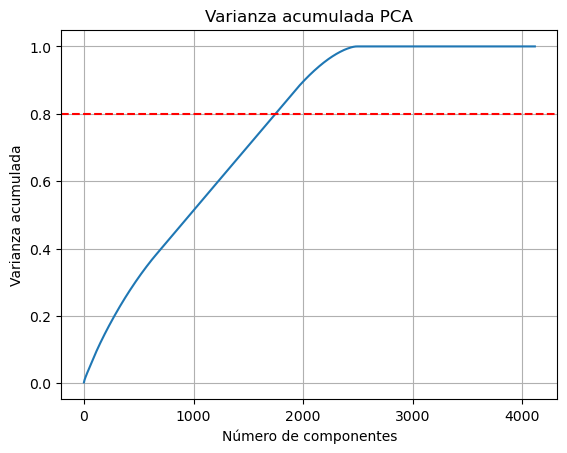

In [14]:
# Varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
plt.plot(varianza_acumulada)
plt.axhline(y=0.80, color='r', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada PCA')
plt.grid(True)
plt.show()

In [15]:
# Selección de número de componentes para ~80% varianza
n_components = 1800

# Aplicar PCA con ese número de componentes
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


F1-score: 0.3969723316115174

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71     24753
           1       0.27      0.74      0.40      5247

    accuracy                           0.61     30000
   macro avg       0.59      0.66      0.55     30000
weighted avg       0.80      0.61      0.65     30000



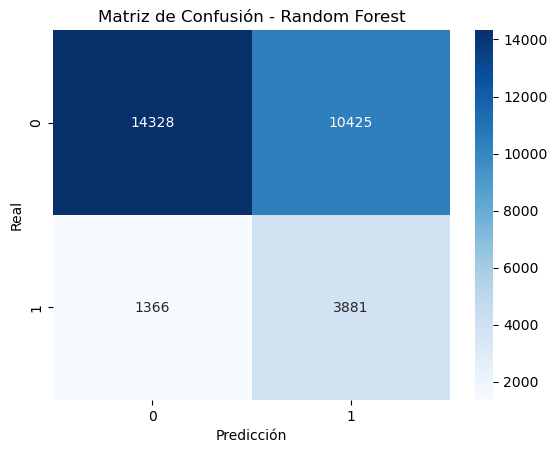

In [18]:
# Random Forest
# Entrenamiento
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
clf.fit(X_train_pca, y_train_res)

# Predicción
y_pred = clf.predict(X_test_pca)

# Evaluación
print("\nF1-score:", f1_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
